In [13]:
import cv2
import matplotlib.pyplot as plt

import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\19292/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\19292/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\19292/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\19292/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\19292/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

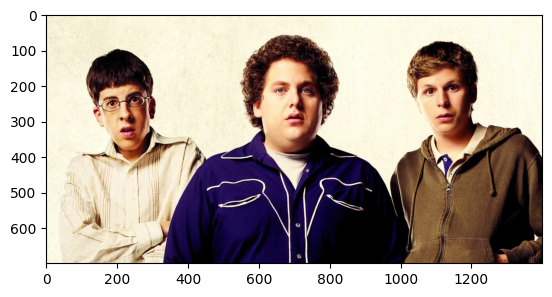

In [14]:
# detect faces
app = FaceAnalysis('buffalo_l')
app.prepare(ctx_id=0, det_size=(640, 640))

img_path = '../assets/superBad.png'
img = cv2.imread(img_path)

plt.imshow(img[:,:,::-1])
plt.show()

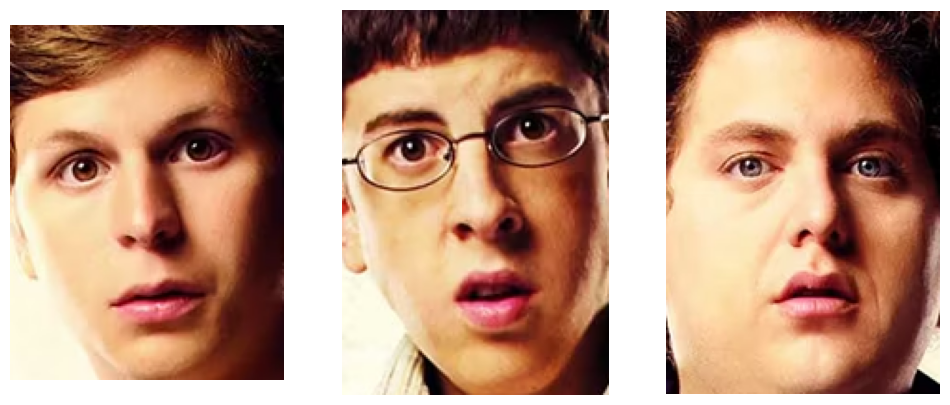

In [15]:
# return faces
faces=app.get(img)
fig, axs = plt.subplots(1,3, figsize=(12,5))

for i, face in enumerate(faces):
    bbox= face['bbox']
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
    axs[i].axis('off')

In [16]:
# face swapper with onnx weights
swapper = insightface.model_zoo.get_model('../assets/inswapper_128.onnx', download=False)



Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


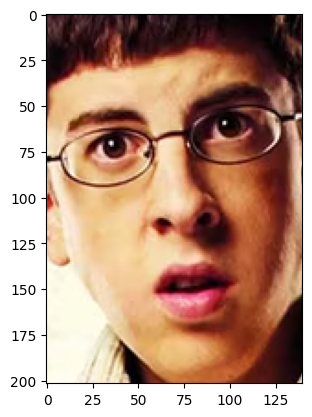

In [17]:
mclovin = faces[1]
bbox= mclovin['bbox']
bbox = [int(b)for b in bbox]
plt.imshow(img[bbox[1]:bbox[3],bbox[0]:bbox[2],::-1])
plt.show()

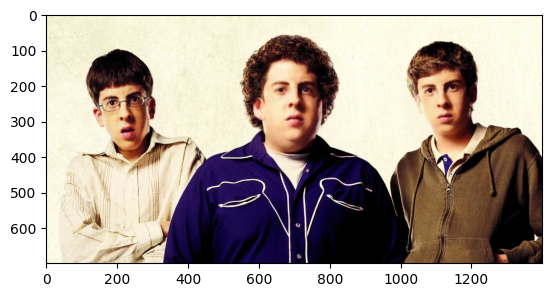

In [18]:
# takes image of the faces and copies it with the swapped faces

res = img.copy()

for face in faces:
    res = swapper.get(res, face, mclovin, paste_back=True)

# swapped faces

plt.imshow(res[:,:,::-1])
plt.show()

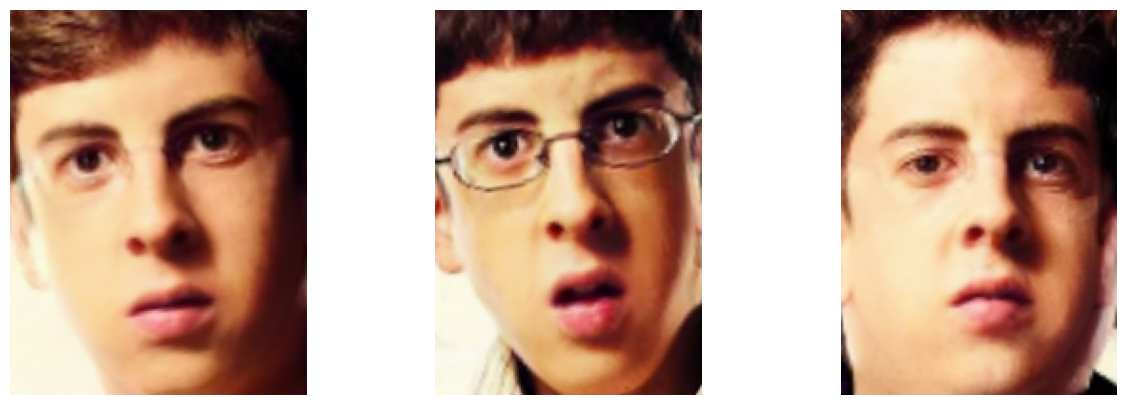

In [19]:
# Initialize the list to store individual swapped faces
individual_faces = []

# Extract each swapped face from the `res` image
for i, face in enumerate(faces):
    # Get bounding box for the current face
    bbox = face['bbox']
    bbox = [int(b) for b in bbox]
    
    # Extract the region of interest (swapped face) from the image
    face_img = res[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    
    # Append the extracted face to the list
    individual_faces.append(face_img)

# Display each swapped face in a subplot
fig, axs = plt.subplots(1, len(individual_faces), figsize=(15, 5))

for i, face_img in enumerate(individual_faces):
    axs[i].imshow(face_img[:, :, ::-1])  # Convert BGR to RGB for display
    axs[i].axis('off')  # Hide axes

plt.show()
